# **Demo: SVM for MNIST Digit Recognition**

Loading the data

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Importing MNIST dataset using Tensorflow

In [2]:
import tensorflow as tf

(Xtr,ytr),(Xts,yts) = tf.keras.datasets.mnist.load_data()

print('Xtr shape: %s' % str(Xtr.shape))
print('Xts shape: %s' % str(Xts.shape))

ntr = Xtr.shape[0]
nts = Xts.shape[0]
nrow = Xtr.shape[1]
ncol = Xtr.shape[2]

11493376/11490434 [==============================] - 0s 0us/step
Xtr shape: (60000, 28, 28)
Xts shape: (10000, 28, 28)


Rescaling the value to -1 to 1 and reshaping it as a $ntr*npix$ and $nts*npix$

In [3]:
npix = nrow*ncol
Xtr = 2*(Xtr/255 - 0.5)
Xtr = Xtr.reshape((ntr,npix))

Xts = 2*(Xts/255 - 0.5)
Xts = Xts.reshape((nts,npix))

Displaying random images

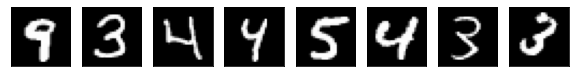

In [4]:
def plt_digit(ax, x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    ax.imshow(xsq,  cmap='Greys_r')
    ax.set_xticks([])
    ax.set_yticks([])

# Select random digits
nplt = 8
Iperm = np.random.permutation(ntr)

# Plot the images using the subplot command
fig, ax = plt.subplots(1,nplt,figsize=(10,3))
for i in range(nplt):
    ind = Iperm[i]
    plt_digit(ax[i], Xtr[ind,:])

**Trying a Logistic Regression Classifier**

In [5]:
ntr1 = 5000
Xtr1 = Xtr[Iperm[:ntr1],:]
ytr1 = ytr[Iperm[:ntr1]]

Running the classifier

In [6]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs', max_iter=500)
logreg.fit(Xtr1, ytr1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=10,
                   warm_start=False)

Saving the results in a pickle file

In [7]:
import pickle

with open("mnist_logreg.p", "wb") as fp:
  pickle.dump( [logreg,Xtr1, ytr1, Iperm], fp)

In [8]:
with open("mnist_logreg.p", "rb") as fp:
  logreg, Xtr1, ytr1, Iperm = pickle.load(fp)

Measuring accuracy on the test data

In [9]:
nts1 = 5000
Iperm_ts = np.random.permutation(nts) 
Xts1 = Xts[Iperm_ts[:nts1],:]
yts1 = yts[Iperm_ts[:nts1]]
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.887600


Plotting errors

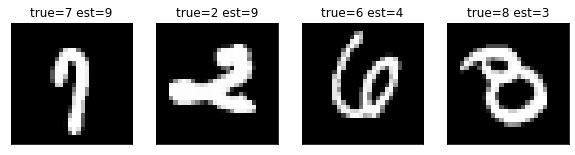

In [10]:
nplt = 4
Ierr = np.where(yts1 != yhat)[0]

fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):        
    ind = Ierr[i]    
    plt_digit(ax[i], Xts1[ind,:])        
    title = 'true={0:d} est={1:d}'.format(yts1[ind].astype(int), yhat[ind].astype(int))
    ax[i].set_title(title)

Plotting the confusion matrix

[[0.952 0.    0.006 0.002 0.    0.036 0.004 0.    0.004 0.   ]
 [0.    0.967 0.006 0.004 0.    0.005 0.002 0.    0.021 0.   ]
 [0.01  0.007 0.848 0.029 0.01  0.009 0.013 0.019 0.054 0.006]
 [0.004 0.004 0.025 0.855 0.002 0.036 0.004 0.011 0.041 0.024]
 [0.002 0.004 0.008 0.004 0.909 0.002 0.009 0.004 0.012 0.041]
 [0.006 0.002 0.014 0.054 0.014 0.832 0.019 0.002 0.029 0.008]
 [0.024 0.004 0.004 0.    0.012 0.029 0.917 0.006 0.    0.002]
 [0.004 0.013 0.018 0.016 0.008 0.    0.002 0.887 0.002 0.051]
 [0.006 0.017 0.012 0.045 0.008 0.057 0.021 0.01  0.806 0.017]
 [0.01  0.006 0.01  0.012 0.041 0.007 0.002 0.019 0.008 0.893]]


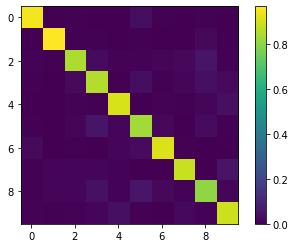

In [11]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts1,yhat)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

Plotting weights for each digit

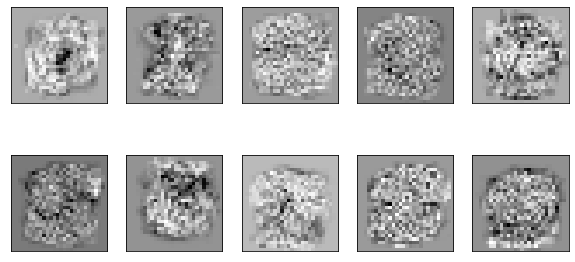

In [12]:
W = logreg.coef_
ndigit = W.shape[0]
fig, ax = plt.subplots(2,5,figsize=(10, 5))
for i in range(ndigit):
    irow = i // 5
    icol = i % 5
    plt_digit(ax[irow,icol], W[i,:])

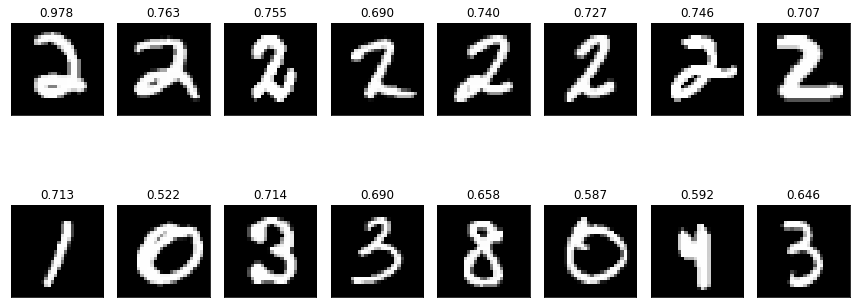

In [13]:
idig = 2
Idig   = np.where(ytr==idig)[0]
Inodig = np.where(ytr!=idig)[0]
n = len(Idig)
Idig = Idig[np.random.permutation(n)]
n = len(Inodig)
Inodig = Inodig[np.random.permutation(n)]

# Set the weight to the first digit
w = Xtr[Idig[0],:]
w = w / np.sum(np.abs(w))

# Find the correlation coefficient with the other digits 7
nplot = 8
fig, ax = plt.subplots(2,nplot,figsize=(12, 6))
rho = np.zeros(nplot)
for i in range(nplot):
    # Get a true and false digit
    j0 = Idig[i]
    j1 = Inodig[i]
    x0 = Xtr[j0,:]
    x1 = Xtr[j1,:]
    
    # Compute the correlations with the two digits
    rho0 = w.dot(x0)
    rho1 = w.dot(x1)
    
    plt_digit(ax[0,i], x0)    
    ax[0,i].set_title('%5.3f' % rho0)
    plt_digit(ax[1,i], x1)
    ax[1,i].set_title('%5.3f' % rho1)

plt.tight_layout()

**Run an SVM Classifier**

In [14]:
from sklearn import svm

# Create a classifier: a support vector classifier
# svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

In [15]:
ntr1 = 5000
nts1 = 5000
Xtr2 = Xtr[Iperm[:ntr1],:]
ytr2 = ytr[Iperm[:ntr1]]
Xts2 = Xts[Iperm_ts[:nts1],:]
yts2 = yts[Iperm_ts[:nts1]]
svc.fit(Xtr2,ytr2)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [16]:
import pickle

with open( "mnist_svc.p", "wb" ) as fp:
    pickle.dump( [svc, Xtr1,ytr1], fp)

In [17]:
yhat_ts = svc.predict(Xts1)

In [18]:
with open("mnist_svc_test.p", "wb") as fp:
    pickle.dump([Xts1,yts1,yhat_ts], fp)

In [19]:
with open("mnist_svc_test.p", "rb") as fp:
    Xts1,yts1,yhat_ts = pickle.load(fp)

In [20]:
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.913800


Visualizing support vectors

In [21]:
S = svc.support_vectors_
S.shape

(1722, 784)

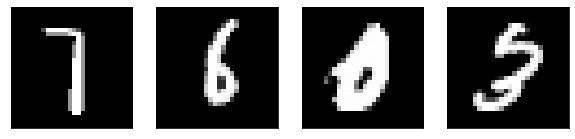

In [22]:
nplt = 4
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):                
    ind = Iperms[i]
    plt_digit(ax[i], S[ind,:])

Using the RBF Kernel

In [23]:
svcrbf = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)

In [24]:
svcrbf.fit(Xtr1,ytr1)
import pickle
with open( "mnist_svcrbf.p", "wb" ) as fp:
    pickle.dump( [svcrbf, Xtr1, ytr1], fp)

[LibSVM]

In [25]:
import pickle
with open( "mnist_svcrbf.p", "rb" ) as fp:
    svcrbf, Xtr1, ytr1 = pickle.load(fp)

In [26]:
yhat_ts = svcrbf.predict(Xts1)

with open("mnist_svcrbf_test.p", "wb") as fp:
    pickle.dump([yhat_ts,yts1,Xts1], fp)

In [27]:
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.965400


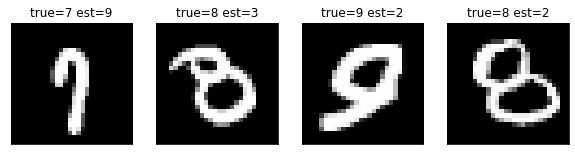

In [28]:
Ierr = np.where((yhat_ts != yts1))[0]
nplt = 4
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):             
    ind = Ierr[i]    
    plt_digit(ax[i], Xts1[ind,:])        
    title = 'true={0:d} est={1:d}'.format(yts1[ind].astype(int), yhat_ts[ind].astype(int))
    ax[i].set_title(title)

In [29]:
S = svcrbf.support_vectors_
S.shape

(3000, 784)

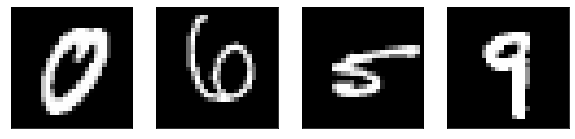

In [30]:
nplt = 4
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
fig, ax = plt.subplots(1,nplt,figsize=(10, 4))
for i in range(nplt):        
    ind = Iperms[i]
    plt_digit(ax[i], S[ind,:])